# linear regression
kapitel 3 islp


In [6]:
import pandas as pd
import numpy as np

data_path = "/Users/luddecmc/Desktop/SKOLARBETE-ITHS/repos/AI24-Statistiska-metoder/Data"

adv = pd.read_csv(data_path+"/Advertising.csv", index_col=0)
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Y (responsvariabeln) är sales i detta fall, vi hoppas detta värdet bestäms av de andra kolumnerna



In [32]:
# Y is a response variable
Y = sales = adv["sales"]
# antag att regressionen av "TV" på "sales" är ungefär linjär
# X brukar kallas för designmatris, innehåller egenskaper/features
# modellspecifikationsmatrisen(designmatrisen) behöver en 1:a i första kolumnen
X = TV = np.column_stack([np.ones(Y.shape[0]), adv["TV"]])
X

array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

$ "sales" = \beta 0 + \beta 1  * "TV" $

$\hat\beta = b = (X'X)^{-1} X'y$

In [11]:
# pseudo-invers för prestanda
b = np.linalg.pinv(X.T @ X) @ X.T @ Y
b

array([7.03259355, 0.04753664])

efter regression får vi en skattare för y:

$\hat{y} = \beta_0 + \beta_1x$

modellen är alltså $\hat{y}= 7.0325, 0.04753x$

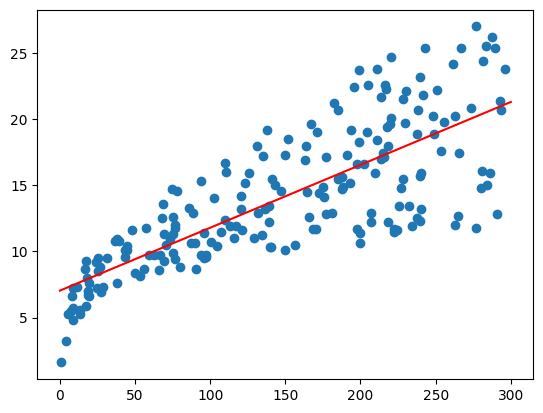

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 1],Y)
x= np.linspace(0,300)
y_hat = b[0] + b[1]*x
plt.plot(x,y_hat,c="red")

$ SSE = (y1 -\hat\beta0 - \hat\beta1 x1)^2 + (y2 - \hat\beta0 - \hat\beta1 x2)^2 + ... + (yn - \hat\beta0 - \hat\beta1 xn)^2$

In [15]:
# RSS Residual sum of squares
# SSE sum of square errors
# samma sak!

#stickprovets storlek ( så många rader det finns i tabllen)
n = Y.shape[0]

# antalet parametrar, bara TV i detta fall, så 1
v = X.shape[1] - 1

SSE = np.sum(np.square(Y - (X@b)))


2102.5305831313512

kovarians

$\texttt{Cov} (X, Y) = E[(X-\mu_X)(Y-\mu_Y)] = E[XY] - E[X]E[Y]$

$S_{xy} \rightarrow (X-\mu_X)(Y-\mu_Y)$

kovariansen är väntevärdet mellan x minus medlet gånger y minus medlet

om X och Y är oberoende så är Cov(X,Y) = 0, men vi kan inte anta det omvända. dvs Cov=0 betyder inte nödväntigsvis att X och Y är oberoende, men de är åtminstone inte linjärt beroende




En starkare egenskap är korrelation(pearson coeffecient of correlation), som är ett värde mellan -1 och 1 (inklusive ändpunkterna).


def.

låt $X$ och $Y$ vara slumpvariabler med medel $\mu_X$  respektive  $\mu_Y$ samt varianser $\sigma_X^2$ och $\sigma_Y^2$.
korrelationen  mellan X och Y ges då av:

$\Rho XY = \frac{cov(X,Y)}{\sqrt{var X var Y}} $

om pearsonkoefficienten är 1 eller -1 (|pxy| = 1) då har vi visat att det finns en ekvation: $Y = \beta_0+\beta_1X$



standardfel (kring medlet) 
$$\frac{\sigma^2}{n}$$

In [20]:
# antalet rader i vår designmatris(stickprovet), antalet parametrar v(1) minus 1
#stickprovvarians
var = SSE/(n-v-1) # uppskattning av skillnanden mellan regressionslinjen och äkta linjen
S = np.sqrt(var) # residual standard error, alltså en uppskattning av standard felet/ stickprovsavvikelsen

# sum of squares Regression, riktiga skillnaden mellan regressionslinje och äkta linjen
SSR = np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y)/n))

#totala variansen i vektorn Y, r
Syy = np.sum(np.square(Y)) - (np.square(np.sum(Y))/n)
Sxx = np.sum(np.square(X)) - (np.square(np.sum(X))/n)

# standard error (of the mean)
se = var / n

# square of standard error of B1 = var/Sxx
se_b = var/Sxx

# confidence interval
ci = (b[1], 2*np.sqrt(se_b))
print(f"Confidence interval on predictor B1: {ci[0]:.4f} +- {ci[1]:.4f}")


Confidence interval on predictor B1: 0.0475 +- 0.0055


Detta är väldigt ungefärligt ett 90% interval ($ < 2 \sigma$). om vi kör regressionen många gånger opå delmängdfer av datan som skall ha samma medel, dvs vara balanserade så väntar vi oss att 05% av värdena hamnar mellan 0.053 och 0.042

$var *(\frac{1}{n * }$

In [29]:
x_mean = np.mean(X[:,1])
se_intercept = var * (1/n * (np.square(x_mean)/(np.square(np.sum(x_mean)))))
se
# borde bli [6.130, 7.935]
se_intercept


0.053094206644731086

### hypotestestning
Noll-hypotes:

$H_0$ : There is no relationship between X and Y

alternativ hypotes:

$H_a$: There is a relationshop between X and Y

$H_0$: $\beta_1 = 0 $

$H_a$: $\beta_1 \neq 0$

### T-statistiska för att testa relevans

$$
t = \frac{\hat{\beta}_1 - \mathbb{0}}{SE({\hat{\beta_1}})}
$$

In [31]:
t = b[1]/se_b
print(f"P värde: {t}")

P värde: 6303.106346187084


regressionen är relevant, men hur bra är den?

$$\hat{\rho} = r = \frac{S_{xy}}{\sqrt{S_{xx}s_{yy§}}}$$

In [ ]:
# pearson correlation coefficient



$$ cor(X,Y) = \frac{\sum\limits^n_{i=1}(x_i-\bar{x})(y_i - \bar{y})}{\sqrt{\sum\limits^{n}_{i=1}(X_i-\bar{x})^2}\sqrt{\sum\limits^{n}_{i=1}(y_i-\bar{y})^2}} $$